### Phase 1: Data Exploration & Cleaning

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

In [25]:
import shap
import warnings
warnings.filterwarnings('ignore')
import matplotlib_inline

In [26]:
BLACK = '#1A1A1A'
DARK_BLUE = '#003366'
MEDIUM_BLUE = '#0066CC'
LIGHT_BLUE = '#66B2FF'
ACCENT_COLOR = '#FF6B6B'
sns.set_palette([DARK_BLUE, MEDIUM_BLUE, LIGHT_BLUE, ACCENT_COLOR])
sns.set_style("whitegrid")

In [27]:
url = "https://raw.githubusercontent.com/IBM/employee-attrition-aif360/master/data/emp_attrition.csv"
df = pd.read_csv(url)

In [28]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [30]:
cat_cols = df.select_dtypes(include=['object']).columns

In [31]:
le = LabelEncoder()

In [32]:
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [33]:
df['IncomeToExperienceRatio'] = df['MonthlyIncome'] / (df['TotalWorkingYears'] + 1)
df['PromotionDelay'] = df['YearsAtCompany'] - df['YearsSinceLastPromotion']
df['OvertimeFrequency'] = df['OverTime'] * df['TrainingTimesLastYear']

In [34]:
df.to_csv('hr_analytics_cleaned.csv', index=False)

### Phase 2: Exploratory Data Analysis (EDA)

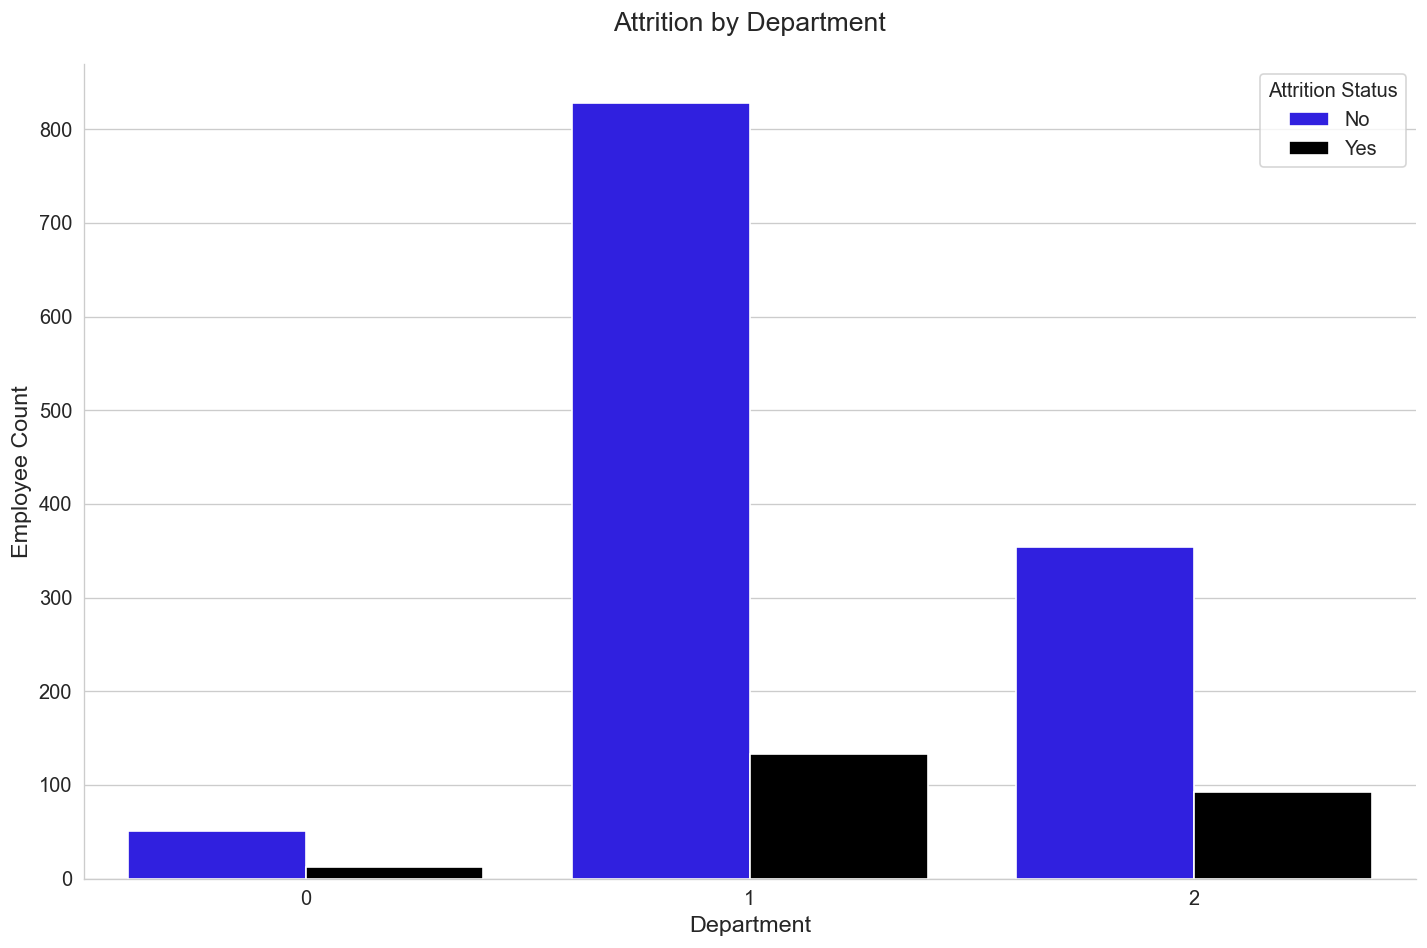

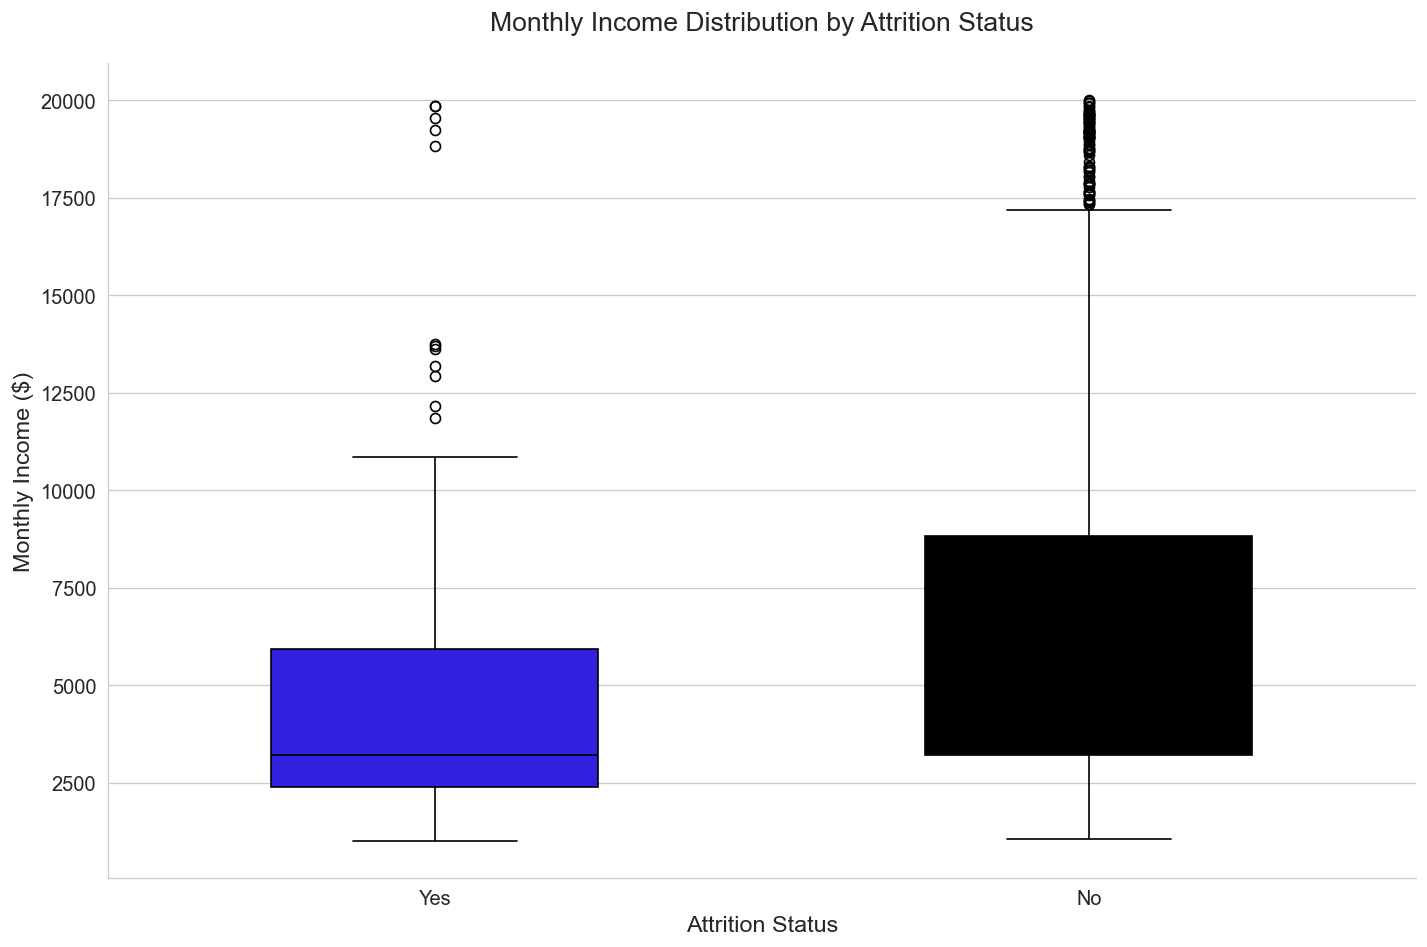

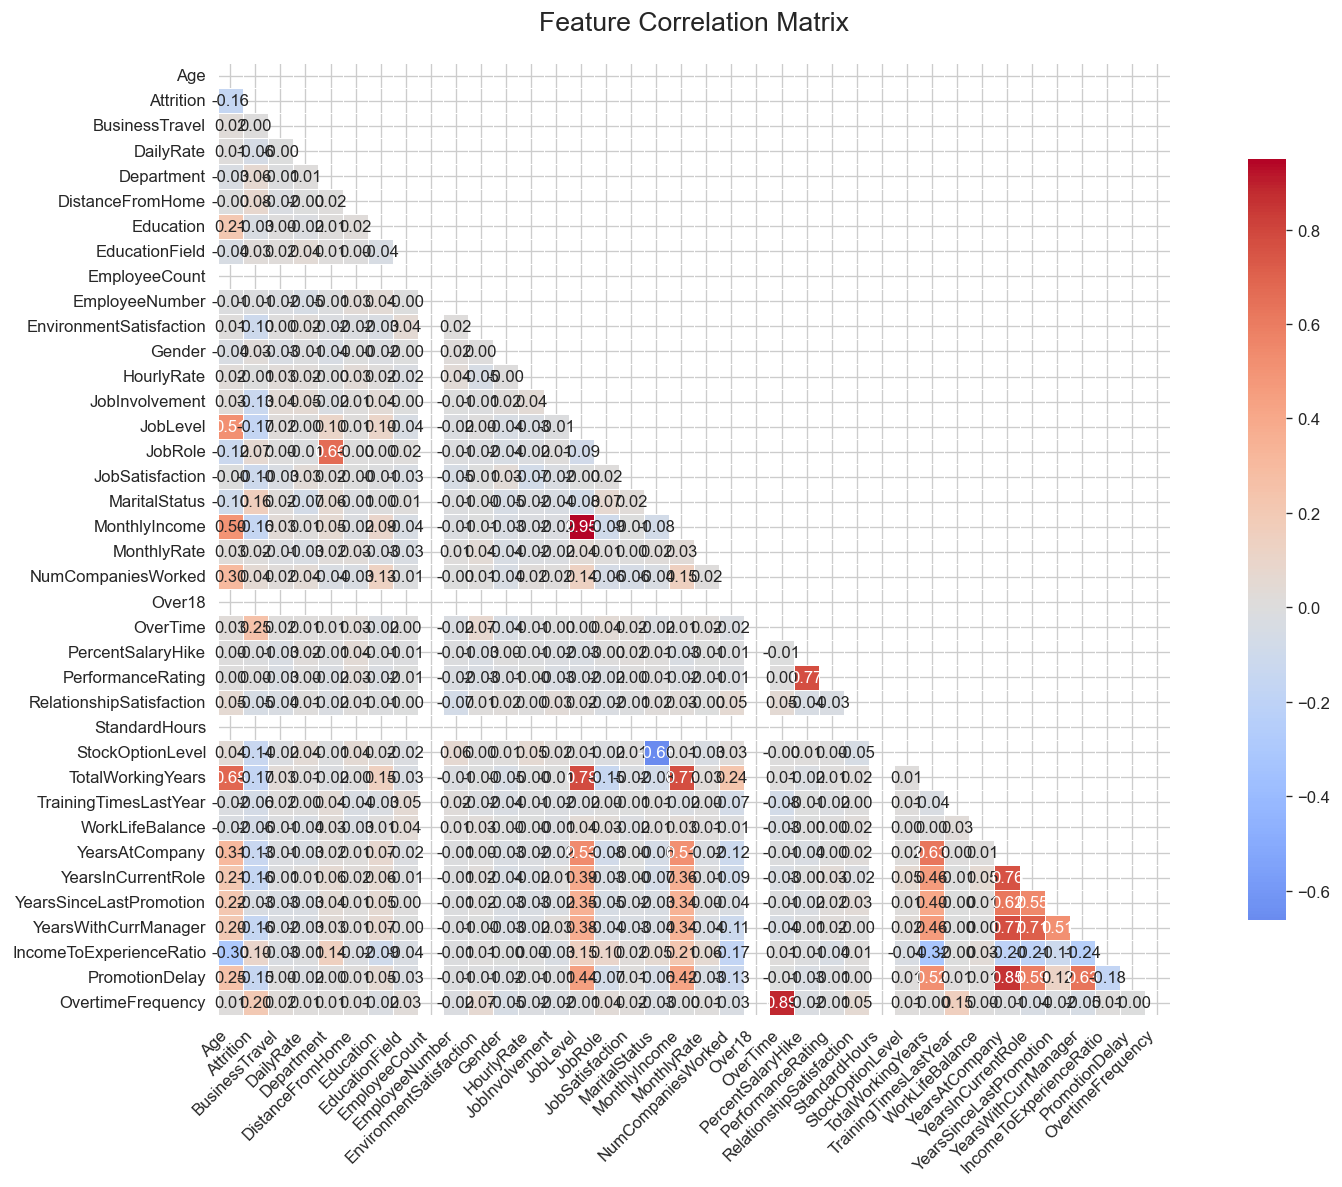

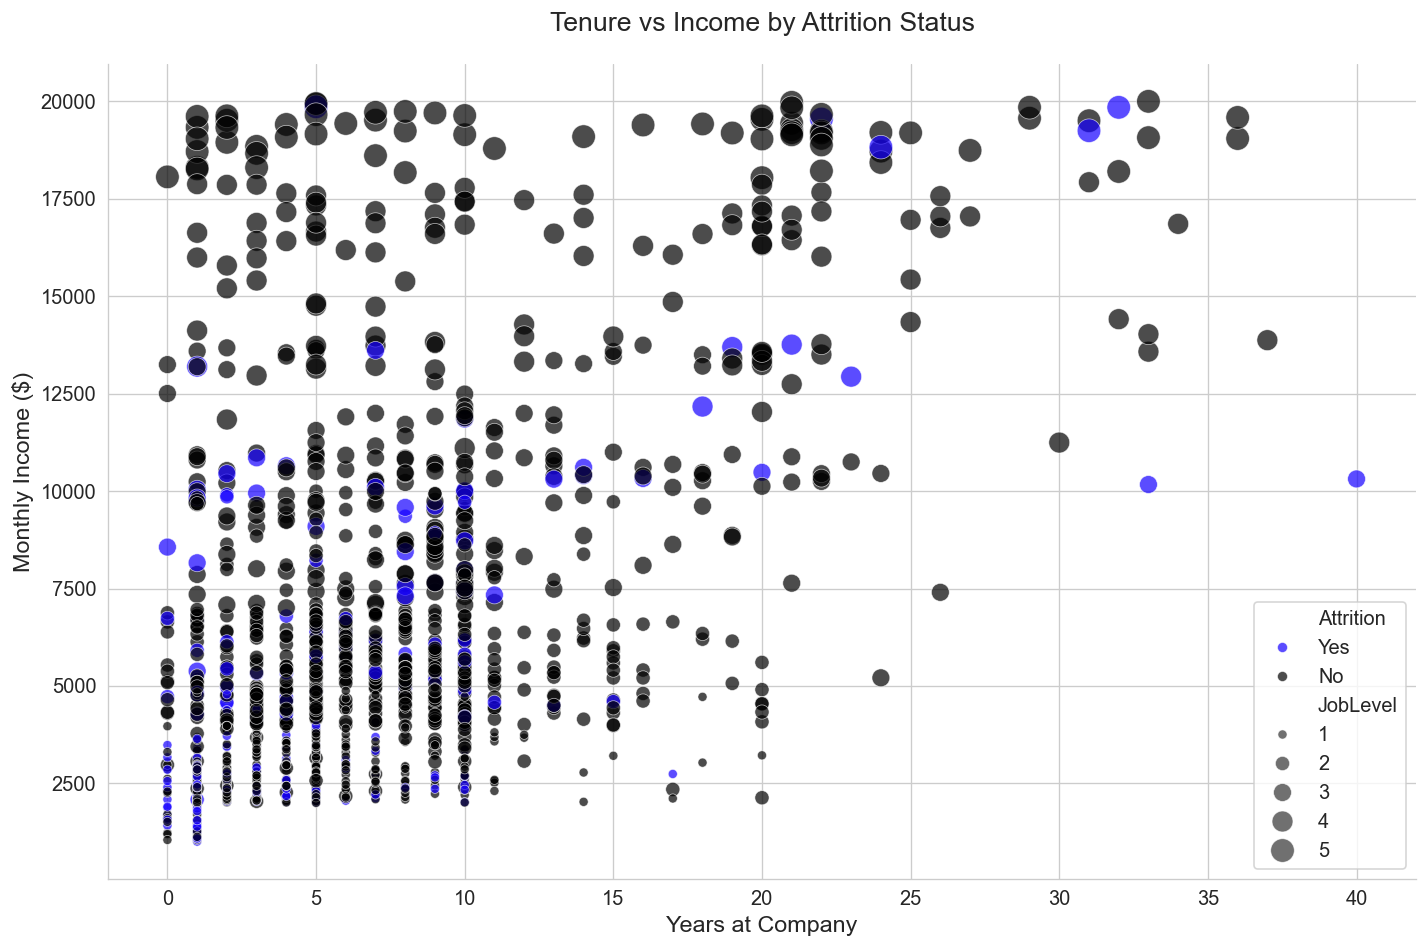

In [44]:


# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 120  # Higher resolution

# 1. Attrition by Department (standalone)
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Department', hue='Attrition', 
                  data=df.replace({'Attrition': {0: 'No', 1: 'Yes'}}),
                  palette=["#1500ff", "#000000"])  # Blue and red colors
plt.title('Attrition by Department', fontsize=16, pad=20)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Employee Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Attrition Status', fontsize=12, title_fontsize=12)
sns.despine()
plt.tight_layout()
plt.savefig('attrition_by_department.png', bbox_inches='tight', dpi=300)
plt.show()

# 2. Salary Distribution by Attrition (standalone)
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Attrition', y='MonthlyIncome', 
                data=df.replace({'Attrition': {0: 'No', 1: 'Yes'}}),
                palette=["#1500ff", "#000000"],
                width=0.5)
plt.title('Monthly Income Distribution by Attrition Status', fontsize=16, pad=20)
plt.xlabel('Attrition Status', fontsize=14)
plt.ylabel('Monthly Income ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.savefig('salary_by_attrition.png', bbox_inches='tight', dpi=300)
plt.show()

# 3. Correlation Heatmap (standalone)
plt.figure(figsize=(14, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                center=0, square=True, linewidths=.5,
                cbar_kws={"shrink": .8},
                annot_kws={"size": 10})
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()

# 4. Tenure vs Income by Attrition (standalone)
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', 
                    hue='Attrition', size='JobLevel',
                    data=df.replace({'Attrition': {0: 'No', 1: 'Yes'}}),
                    palette=["#1500ff", "#000000"],
                    sizes=(30, 200), alpha=0.7)
plt.title('Tenure vs Income by Attrition Status', fontsize=16, pad=20)
plt.xlabel('Years at Company', fontsize=14)
plt.ylabel('Monthly Income ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, title_fontsize=12)
sns.despine()
plt.tight_layout()
plt.savefig('tenure_vs_income.png', bbox_inches='tight', dpi=300)
plt.show()

### Phase 3: Machine Learning Model Building

In [45]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
scaler = StandardScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [51]:
y_pred_lr = lr.predict(X_test_scaled)

In [52]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [53]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [54]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    
    # Visualize confusion matrix
    plt.figure(figsize=(6, 4), facecolor=BLACK)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'])
    plt.title(f'{model_name} Confusion Matrix', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.savefig(f'confusion_matrix_{model_name.lower().replace(" ", "_")}.png', 
                facecolor=BLACK, bbox_inches='tight', dpi=300)
    plt.show()


Logistic Regression Evaluation
Accuracy: 0.7437641723356009
Confusion Matrix:
 [[291  89]
 [ 24  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       380
           1       0.29      0.61      0.40        61

    accuracy                           0.74       441
   macro avg       0.61      0.69      0.62       441
weighted avg       0.84      0.74      0.78       441



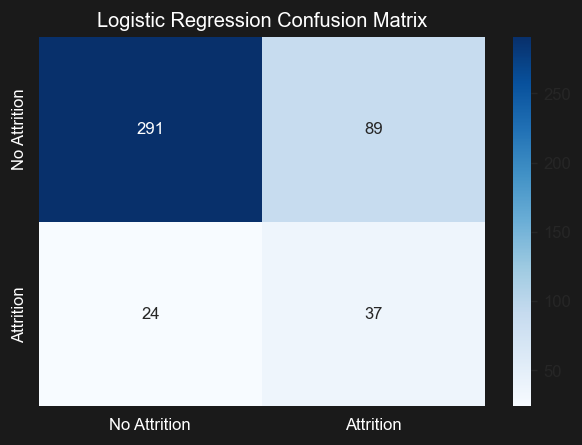


Decision Tree Evaluation
Accuracy: 0.8390022675736961
Confusion Matrix:
 [[358  22]
 [ 49  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       380
           1       0.35      0.20      0.25        61

    accuracy                           0.84       441
   macro avg       0.62      0.57      0.58       441
weighted avg       0.81      0.84      0.82       441



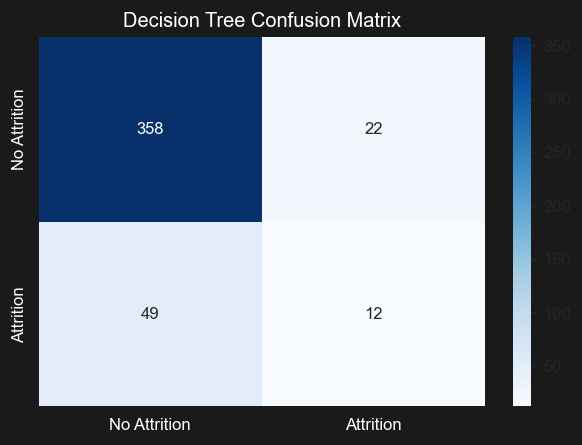


Random Forest Evaluation
Accuracy: 0.8662131519274376
Confusion Matrix:
 [[377   3]
 [ 56   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.62      0.08      0.14        61

    accuracy                           0.87       441
   macro avg       0.75      0.54      0.54       441
weighted avg       0.84      0.87      0.82       441



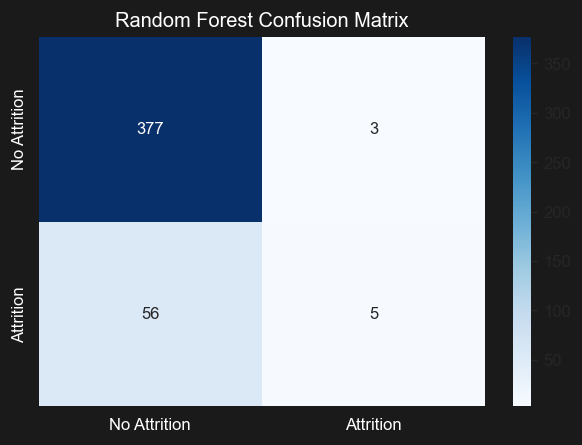

In [55]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

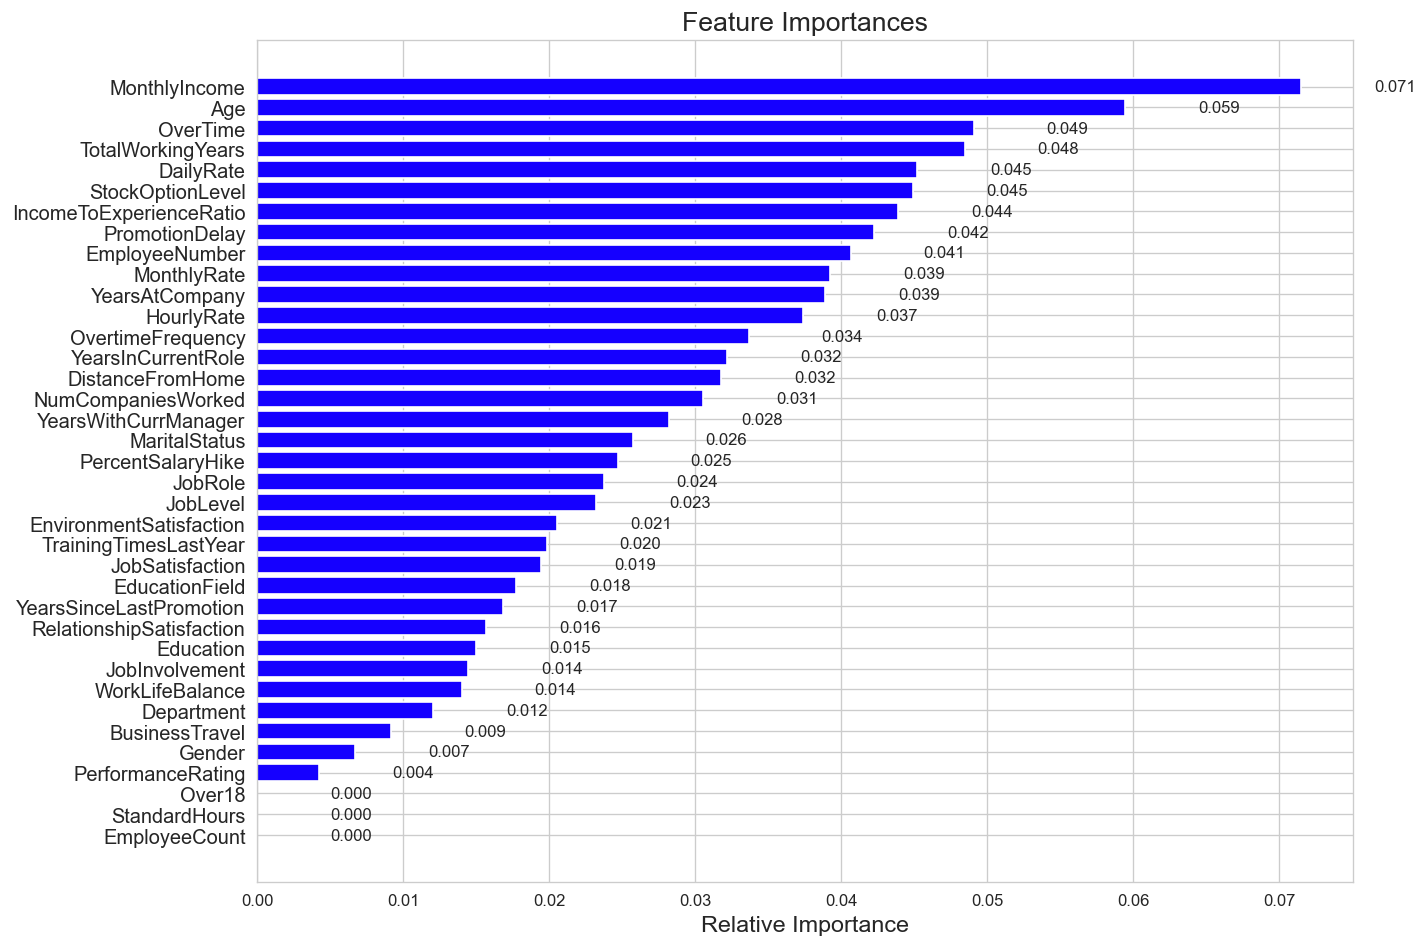

In [65]:
plt.figure(figsize=(12, 8))
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.title('Feature Importances', fontsize=16)
bars = plt.barh(range(len(indices)), importances[indices], color='#1500ff', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=12)
plt.xlabel('Relative Importance', fontsize=14)
plt.gca().invert_yaxis()

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', 
             ha='left', va='center', 
             fontsize=10)

plt.tight_layout()
plt.savefig('feature_importances.png', bbox_inches='tight', dpi=300)
plt.show()

### Phase 5: SHAP Analysis & Recommendations

In [66]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

<Figure size 1440x960 with 0 Axes>

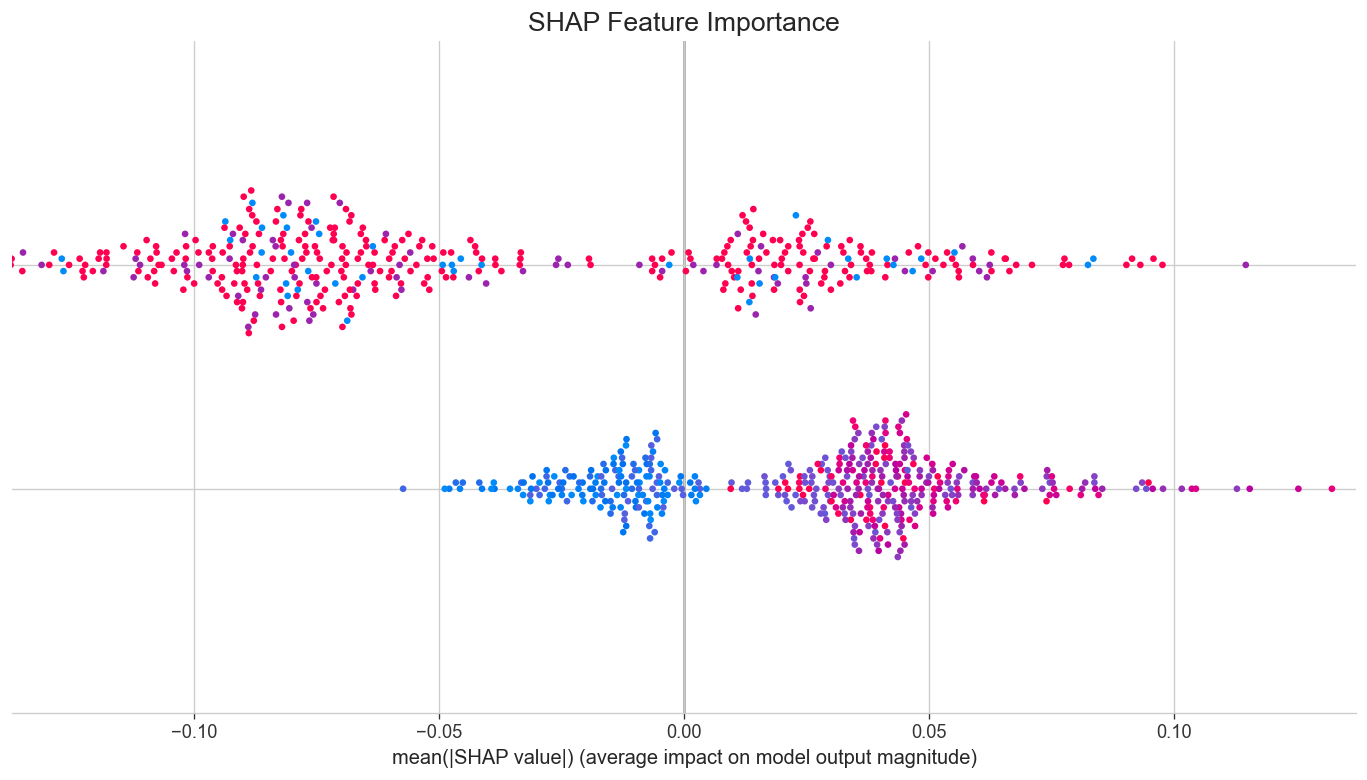

In [70]:
# First ensure your test data matches the SHAP values shape


# Correct approach:
plt.figure(figsize=(12, 8))

# Use the correct SHAP values (try these alternatives if needed)
if len(shap_values) == 2:  # For binary classification
    shap.summary_plot(shap_values[1], X_test, 
                     feature_names=X.columns,
                     plot_type="bar",
                     show=False)
else:  # For single output or regression
    shap.summary_plot(shap_values, X_test,
                     feature_names=X.columns,
                     plot_type="bar",
                     show=False)

plt.title("SHAP Feature Importance", fontsize=16)
plt.gca().set_facecolor('white')
plt.xlabel("mean(|SHAP value|) (average impact on model output magnitude)", fontsize=12)
plt.tight_layout()
plt.savefig('shap_summary.png', bbox_inches='tight', dpi=300)
plt.show();